<a href="https://colab.research.google.com/github/NLawrenz/master-thesis/blob/master/Kernel_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objs as go
import pandas as pd 
import sklearn.datasets
from sklearn.preprocessing import normalize

In [2]:
def abstention(probs,d = 0.4, d2 = 0.3,type="s"):

  """
  Parameters
  ----------
  probs - array of probabilities
  d     - float between 0 and 0.5, rejection param, default 0.4
  d2    - float between 0 and 0.5, rejection param, default 0.6, needef if type = 'a'
  type  - {'a','s'}, default 's'. 

  Returns
  ----------
  abs : array of {0,1,2}, 2 is representive for rejected'
  """

  abs = np.array(probs)
  if type == "s":
    mask0 = abs < d
    mask1 = abs > 1-d
    mask2 = (abs >=d) & (abs <=1-d)
    
    abs[mask0] = 0
    abs[mask1] = 1
    abs[mask2] = 2
    abs = np.array(abs, dtype = int)
    return abs 
  if type == "a":
    mask0 = abs < d
    mask1 = abs > 1-d2
    mask2 = (abs >=d) & (abs <=1-d2)
    
    abs[mask0] = 0
    abs[mask1] = 1
    abs[mask2] = 2
    abs = np.array(abs, dtype = int)
    return abs
  

In [3]:
pip install git+https://github.com/NLawrenz/localreg@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/NLawrenz/localreg (to revision master) to /tmp/pip-req-build-muv257bu
  Running command git clone -q https://github.com/NLawrenz/localreg /tmp/pip-req-build-muv257bu
  Created wheel for localreg: filename=localreg-0.5.0-py3-none-any.whl size=31750 sha256=4fcf510e73c49b41dd0f9d7801b6c02fcef8809e26f5c997f1e0028a4829e020
  Stored in directory: /tmp/pip-ephem-wheel-cache-gln_n5m0/wheels/b2/af/9e/7df8782586806dd741f83f6247f26ba36cbd216bf4abec354a
Successfully built localreg


In [4]:
from localreg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Axes3D import has side effects, it enables using projection='3d' in add_subplot


# 2 Dimensional Normal Distribution

In [ ]:
random.seed(42)

mu0 = [0, 0]
sigma0 = np.array([[1, 0.5], [0.5, 1]])
sigma1 = np.array([[1, 0.5], [0.5, 1]])

X = np.random.multivariate_normal(mu0, sigma0, 5000)
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2



y = np.ones((5000,))
y[:2000] = 0
df = pd.DataFrame({'dim1':X[:, 0], 'dim2':X[:, 1],'label':np.array(y, dtype = int)})

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

## Local Polynomial Regression

0.8896969696969697


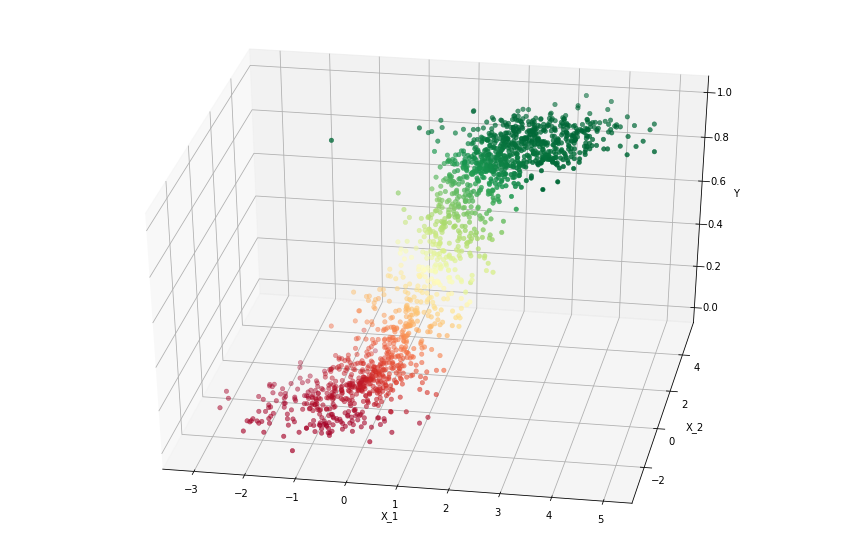

In [ ]:
fig = plt.figure(figsize=np.array([30, 20])/2)
ax = fig.add_subplot(111, projection='3d')


degree = 1
best = 0
bestRad = 0
# Local Polynomial Regression
z0 = localreg(X_train, y_train, X_test, degree=degree, kernel=rbf.cosine, radius=0.68) # h = 5000^(-1/(2beta +2) ) = 0.67899253535 0.68
z0[z0>1] = 1
z0[z0<0] = 0
y_hat = abstention(z0, d = 0.5)
print(np.mean(y_hat == y_test))

ax.scatter(X_test[:,0],X_test[:,1],z0, c=z0, cmap='RdYlGn', linewidth=0.5);
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')

ax.view_init(35, 280)

In [ ]:
y_hat = abstention(z0, d = 0.5)

In [ ]:
np.mean(y_hat == y_test)

0.8896969696969697

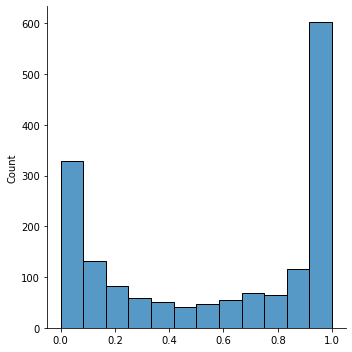

In [ ]:
sns.displot(z0, kde=False)

### Symmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
#y = y
probs = z0
RR = np.array([])
ER = np.array([])
t1=1
t2=1

TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))
  RR = np.append(RR,R)
  ER = np.append(ER,E)

  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)


rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.000000,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
Reject_Rate,0.998182,0.755152,0.684848,0.623030,0.580606,0.547879,0.508485,0.477576,0.440000,0.413333,...,0.060000,0.051515,0.044848,0.040606,0.033333,0.027879,0.020606,0.014545,0.005455,0.000000
Error_Rate,0.001818,0.004848,0.005455,0.006061,0.006667,0.007273,0.009091,0.009091,0.012121,0.015758,...,0.083030,0.086061,0.090303,0.090909,0.092727,0.095152,0.100606,0.104848,0.107879,0.110303
TypI,0.000000,0.001818,0.001818,0.002424,0.002424,0.003030,0.004242,0.004242,0.006061,0.008485,...,0.043030,0.045455,0.047879,0.048485,0.049091,0.049091,0.052727,0.055152,0.055758,0.058182
TypII,0.000000,0.001212,0.001818,0.001818,0.002424,0.002424,0.003030,0.003030,0.004242,0.005455,...,0.038182,0.038788,0.040606,0.040606,0.041818,0.044242,0.046061,0.047879,0.050303,0.050303


In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']
rates

,d,Reject_Rate,Error_Rate,TypI,TypII,Risk
0,0.00,0.998182,0.001818,0.000000,0.000000,0.000000
1,0.01,0.755152,0.004848,0.001818,0.001212,0.010582
2,0.02,0.684848,0.005455,0.001818,0.001818,0.017333
3,0.03,0.623030,0.006061,0.002424,0.001818,0.022933
4,0.04,0.580606,0.006667,0.002424,0.002424,0.028073
5,0.05,0.547879,0.007273,0.003030,0.002424,0.032848
6,0.06,0.508485,0.009091,0.004242,0.003030,0.037782
7,0.07,0.477576,0.009091,0.004242,0.003030,0.040703
8,0.08,0.440000,0.012121,0.006061,0.004242,0.045503
9,0.09,0.413333,0.015758,0.008485,0.005455,0.051139


In [ ]:
rates.set_index('d')

,Reject_Rate,Error_Rate,TypI,TypII,Risk
d,,,,,
0.00,0.998182,0.001818,0.000000,0.000000,0.000000
0.01,0.755152,0.004848,0.001818,0.001212,0.010582
0.02,0.684848,0.005455,0.001818,0.001818,0.017333
0.03,0.623030,0.006061,0.002424,0.001818,0.022933
0.04,0.580606,0.006667,0.002424,0.002424,0.028073
0.05,0.547879,0.007273,0.003030,0.002424,0.032848
0.06,0.508485,0.009091,0.004242,0.003030,0.037782
0.07,0.477576,0.009091,0.004242,0.003030,0.040703
0.08,0.440000,0.012121,0.006061,0.004242,0.045503


In [ ]:
temp = rates.rename(columns={'d':'$d$',"Reject_Rate": "$\Pp(f \Rg \Rr)$",
                      "Error_Rate": "$ \Pp(f \Rg Y) $", 'TypI': '$\Pp(f=0,\,Y=1)$','TypII': '$\Pp(f=1,\,Y=0)$', 'Risk':'$R(f)$' })
temp.set_index('$d$')

,$\Pp(f \Rg \Rr)$,$ \Pp(f \Rg Y) $,"$\Pp(f=0,\,Y=1)$","$\Pp(f=1,\,Y=0)$",$R(f)$
$d$,,,,,
0.00,0.998182,0.001818,0.000000,0.000000,0.000000
0.01,0.755152,0.004848,0.001818,0.001212,0.010582
0.02,0.684848,0.005455,0.001818,0.001818,0.017333
0.03,0.623030,0.006061,0.002424,0.001818,0.022933
0.04,0.580606,0.006667,0.002424,0.002424,0.028073
0.05,0.547879,0.007273,0.003030,0.002424,0.032848
0.06,0.508485,0.009091,0.004242,0.003030,0.037782
0.07,0.477576,0.009091,0.004242,0.003030,0.040703
0.08,0.440000,0.012121,0.006061,0.004242,0.045503


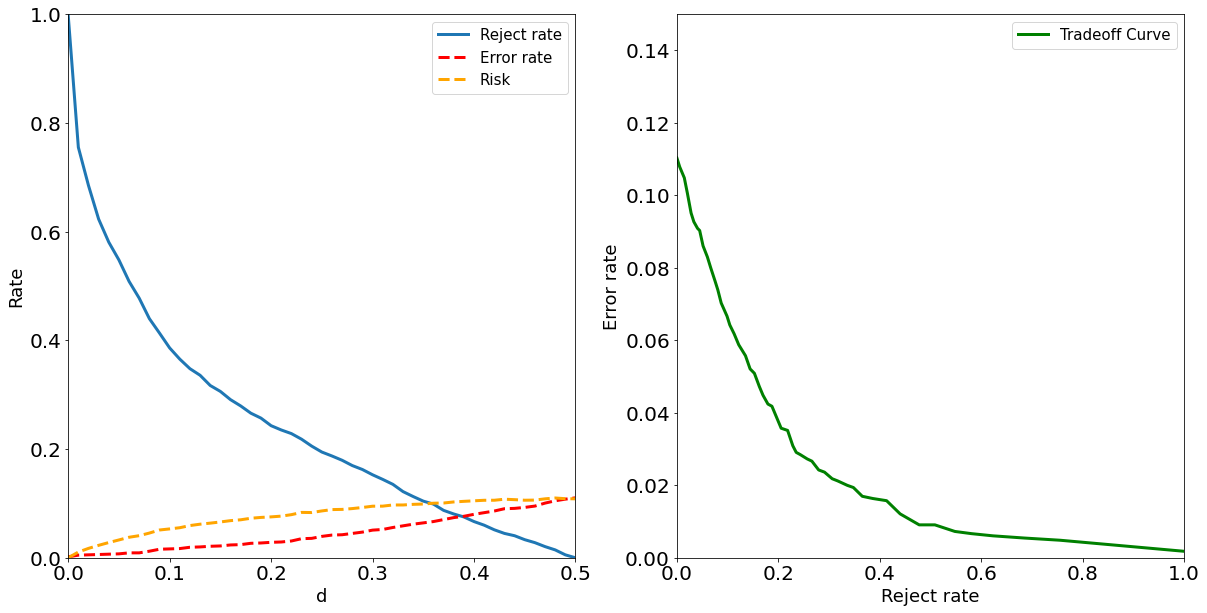

In [ ]:
linewidth = 3
fontsize = 18

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)
ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='red',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['Error_Rate'],label = 'Tradeoff Curve',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

random.seed(42)

mu0 = [0, 0]
sigma0 = np.array([[1, 0.5], [0.5, 1]])
sigma1 = np.array([[1, 0.5], [0.5, 1]])

X = np.random.multivariate_normal(mu0, sigma0, 5000)
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2



y = np.ones((5000,))
y[:2000] = 0
df = pd.DataFrame({'dim1':X[:, 0], 'dim2':X[:, 1],'label':np.array(y, dtype = int)})

# 4 Dimensional Normal Distribution

In [ ]:

random.seed(42)

mu0 = [1.3, 1.7, 2, 5]
mu1 = [1, 2, 1, 4]
sigma0 = np.array([[1, 0.75, 0.5, 0], [0.75, 1, 0.75, 0.5],[0.5, 0.75, 1, 0.75], [0, 0.5, 0.75, 1]])
sigma1 = sigma0
n1 = 500
n2 = 600
X1 = np.random.multivariate_normal(mu0, sigma0, n1)
y1 = np.zeros(n1)

X2 = np.random.multivariate_normal(mu1, sigma1, n2)
y2 = np.ones(n2)

X = np.vstack((X1, X2))
y = np.append(y1,y2)

df = pd.DataFrame(X, columns = ['X1','X2','X3','X4'])
df['label'] = y

#sns.pairplot(df, hue = 'label', palette = {0: 'green', 1 : 'red'})

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(1100, 4)

## Local Polynomial Regression

In [ ]:
degree = 2

z0 = localreg(X_train, y_train, X_test, degree=degree, kernel=rbf.cosine, radius=1.6) # h = 5000^(-1/(2beta +2) ) = 0.67899253535 0.68
z0[z0>1] = 1
z0[z0<0] = 0
y_hat = abstention(z0, d = 0.5)
np.mean(y_hat == y_test)


0.8757575757575757

In [ ]:
y_hat = abstention(z0, d = 0.5)
np.mean(y_hat == y_test)

0.8757575757575757

### Symmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
#y = y
probs = z0
RR = np.array([])
ER = np.array([])
t1=1
t2=1

TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))
  RR = np.append(RR,R)
  ER = np.append(ER,E)

  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)


rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
Reject_Rate,1.0,0.621212,0.600000,0.581818,0.554545,0.542424,0.527273,0.515152,0.487879,0.475758,...,0.112121,0.106061,0.100000,0.081818,0.069697,0.057576,0.039394,0.024242,0.015152,0.000000
Error_Rate,0.0,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,...,0.060606,0.066667,0.072727,0.081818,0.084848,0.093939,0.103030,0.115152,0.115152,0.124242
TypI,0.0,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,...,0.030303,0.036364,0.039394,0.045455,0.048485,0.051515,0.057576,0.069697,0.069697,0.072727
TypII,0.0,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,...,0.030303,0.030303,0.033333,0.036364,0.036364,0.042424,0.045455,0.045455,0.045455,0.051515


In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']
rates

,d,Reject_Rate,Error_Rate,TypI,TypII,Risk
0,0.00,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,0.621212,0.009091,0.003030,0.006061,0.015303
2,0.02,0.600000,0.009091,0.003030,0.006061,0.021091
3,0.03,0.581818,0.009091,0.003030,0.006061,0.026545
4,0.04,0.554545,0.009091,0.003030,0.006061,0.031273
5,0.05,0.542424,0.009091,0.003030,0.006061,0.036212
6,0.06,0.527273,0.009091,0.003030,0.006061,0.040727
7,0.07,0.515152,0.009091,0.003030,0.006061,0.045152
8,0.08,0.487879,0.009091,0.003030,0.006061,0.048121
9,0.09,0.475758,0.009091,0.003030,0.006061,0.051909


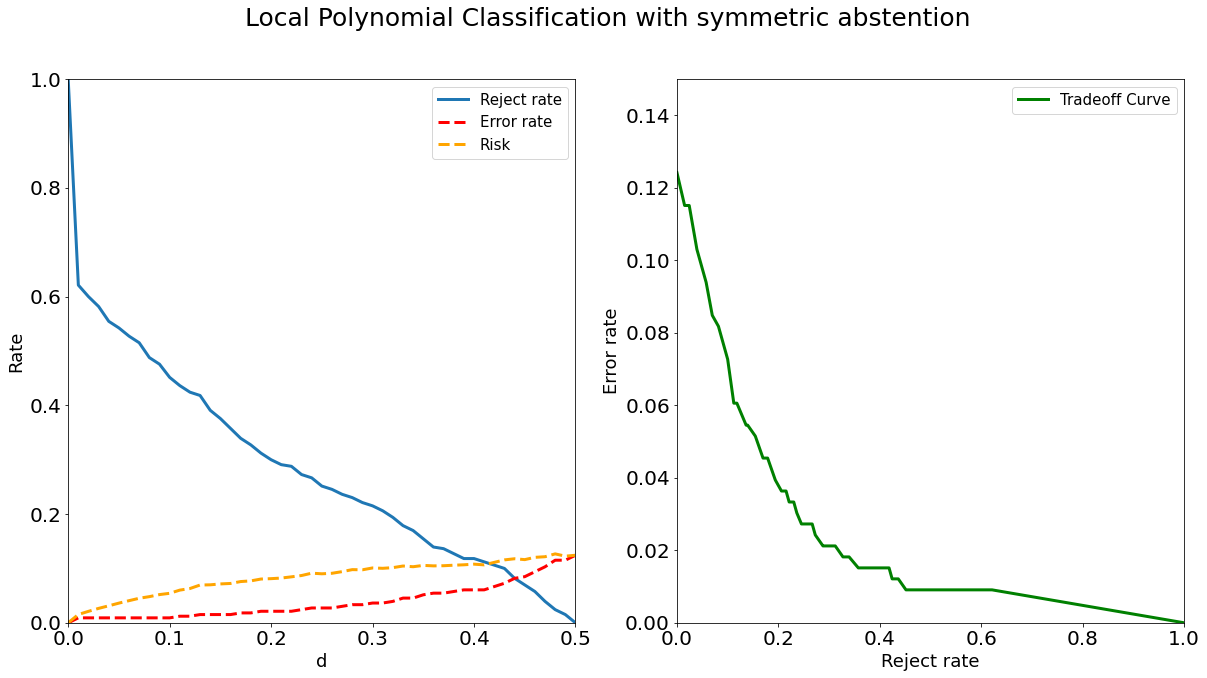

In [ ]:
linewidth = 3
fontsize = 18

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)
ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='red',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['Error_Rate'],label = 'Tradeoff Curve',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


fig.suptitle('Local Polynomial Classification with symmetric abstention', size = 25)

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

### Asymmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
t1,t2 = 1, 0.5
d = 0.4

In [ ]:
#
probs = z0
RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
A,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
B,1.0,0.995000,0.990000,0.985000,0.980000,0.975000,0.970000,0.965000,0.960000,0.955000,...,0.795000,0.790000,0.785000,0.780000,0.775000,0.770000,0.765000,0.760000,0.755000,0.750000
Reject_Rate,1.0,0.621212,0.600000,0.581818,0.554545,0.542424,0.527273,0.515152,0.487879,0.475758,...,0.112121,0.106061,0.100000,0.081818,0.069697,0.057576,0.039394,0.024242,0.015152,0.000000
Error_Rate,0.0,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,...,0.060606,0.066667,0.072727,0.081818,0.084848,0.093939,0.103030,0.115152,0.115152,0.124242
TypI,0.0,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,0.003030,...,0.030303,0.036364,0.039394,0.045455,0.048485,0.051515,0.057576,0.069697,0.069697,0.072727
TypII,0.0,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,...,0.030303,0.030303,0.033333,0.036364,0.036364,0.042424,0.045455,0.045455,0.045455,0.051515


In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

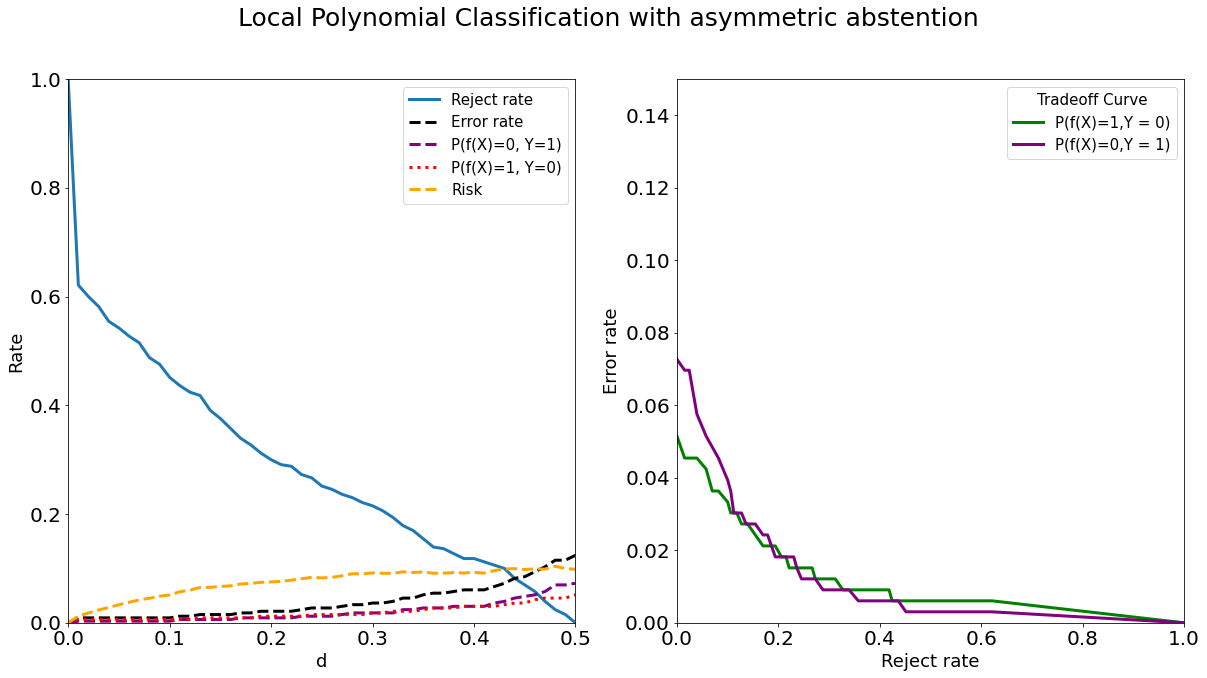

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})

fig.suptitle('Local Polynomial Classification with asymmetric abstention', size = 25)

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
X_exp = df[['X1','X2','X3','X4']]
y_exp = df['label']

lda = LDA(n_components=1, solver='svd', store_covariance=True).fit(X_exp, y)
proba = lda.predict_proba(X_exp)[:,1]

df['abs'] = abstention(proba, d= 0.1)
df['proba'] = proba

Parameters

probs - array of probabilities
d     - float between 0 and 0.5, rejection param, default 0.4
d2    - float between 0 and 0.5, rejection param, default 0.6, needef if type = 'a'
type  - {'a','s'}, default 's'.
Returns

abs : array of {0,1,2}, 2 is representive for rejected'
1


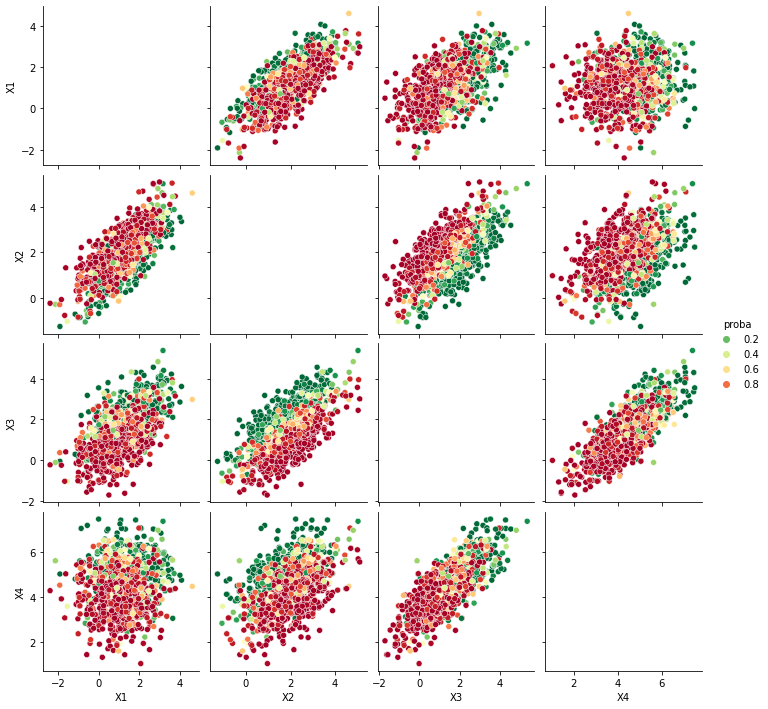

In [ ]:
sns.pairplot(df.drop(['label', 'abs'], axis = 1), hue = 'proba',palette = 'RdYlGn_r')

In [ ]:
X_train, X_test, y_train, y_test = tts(df[['X1','X2','X3','X4']], df['label'], test_size=0.5, random_state=42)


In [ ]:
lda = LDA(n_components=1, solver='svd', store_covariance=True).fit(X_train, y_train)
y_hat = lda.predict(X_test)
np.mean(y_hat == y_test)

0.9109090909090909

### Symmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
probs = lda.predict_proba(X_test)[:,1]
RR = np.array([])
ER = np.array([])
t1=1
t2=1

TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))
  RR = np.append(RR,R)
  ER = np.append(ER,E)

  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)


rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
Reject_Rate,1.0,0.681818,0.572727,0.516364,0.467273,0.447273,0.421818,0.400000,0.363636,0.341818,...,0.040000,0.036364,0.027273,0.023636,0.018182,0.012727,0.009091,0.005455,0.003636,0.000000
Error_Rate,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.069091,0.069091,0.070909,0.072727,0.078182,0.081818,0.083636,0.087273,0.089091,0.089091
TypI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027273,0.027273,0.027273,0.027273,0.030909,0.034545,0.036364,0.040000,0.041818,0.041818
TypII,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.041818,0.041818,0.043636,0.045455,0.047273,0.047273,0.047273,0.047273,0.047273,0.047273


In [ ]:
t1, t2 = 1,1

rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
Reject_Rate,1.0,0.681818,0.572727,0.516364,0.467273,0.447273,0.421818,0.400000,0.363636,0.341818,...,0.040000,0.036364,0.027273,0.023636,0.018182,0.012727,0.009091,0.005455,0.003636,0.000000
Error_Rate,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.069091,0.069091,0.070909,0.072727,0.078182,0.081818,0.083636,0.087273,0.089091,0.089091
TypI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027273,0.027273,0.027273,0.027273,0.030909,0.034545,0.036364,0.040000,0.041818,0.041818
TypII,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.041818,0.041818,0.043636,0.045455,0.047273,0.047273,0.047273,0.047273,0.047273,0.047273
Risk,0.0,0.006818,0.011455,0.015491,0.020509,0.024182,0.028945,0.033455,0.034545,0.036218,...,0.085491,0.084364,0.082636,0.083127,0.086364,0.087673,0.087909,0.089891,0.090873,0.089091


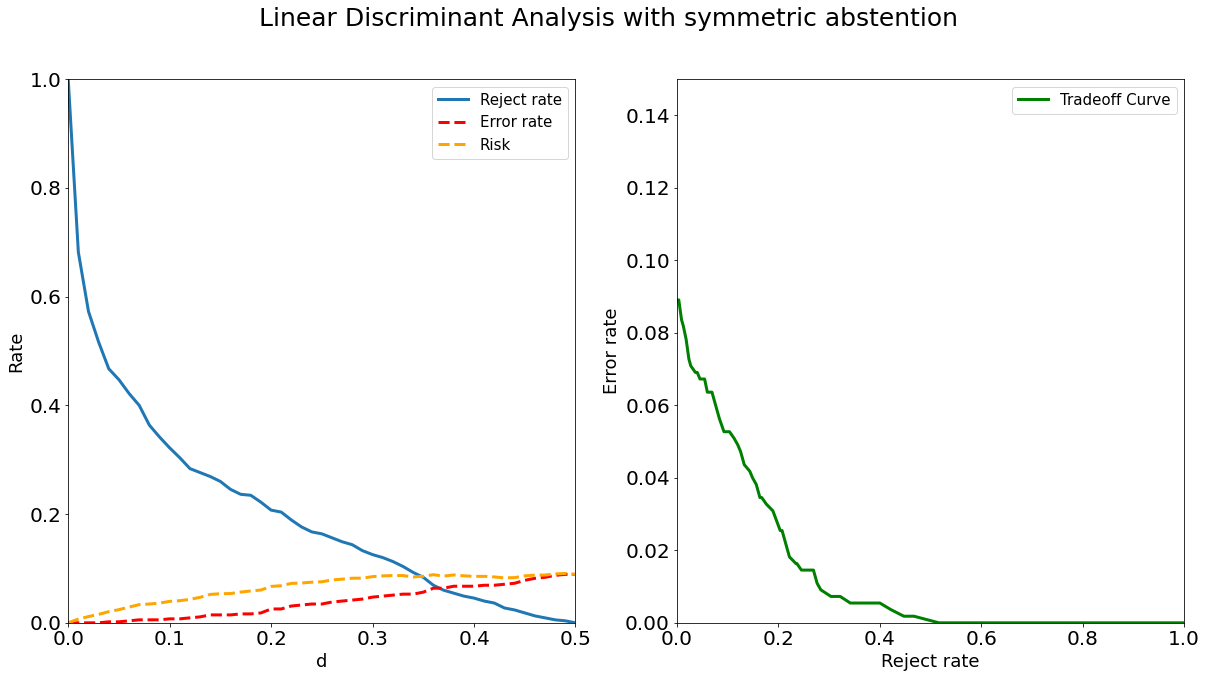

In [ ]:
linewidth = 3
fontsize = 18

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)
ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='red',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

fig.suptitle('Linear Discriminant Analysis with symmetric abstention', size = 25)

ax[1].plot(rates['Reject_Rate'],rates['Error_Rate'],label = 'Tradeoff Curve',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

### Asymmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
t1,t2 = 1, 0.5

In [ ]:
#
probs = probs
RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
A,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
B,1.0,0.995000,0.990000,0.985000,0.980000,0.975000,0.970000,0.965000,0.960000,0.955000,...,0.795000,0.790000,0.785000,0.780000,0.775000,0.770000,0.765000,0.760000,0.755000,0.750000
Reject_Rate,1.0,0.681818,0.572727,0.516364,0.467273,0.447273,0.421818,0.400000,0.363636,0.341818,...,0.040000,0.036364,0.027273,0.023636,0.018182,0.012727,0.009091,0.005455,0.003636,0.000000
Error_Rate,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.069091,0.069091,0.070909,0.072727,0.078182,0.081818,0.083636,0.087273,0.089091,0.089091
TypI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027273,0.027273,0.027273,0.027273,0.030909,0.034545,0.036364,0.040000,0.041818,0.041818
TypII,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.041818,0.041818,0.043636,0.045455,0.047273,0.047273,0.047273,0.047273,0.047273,0.047273


In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
A,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
B,1.0,0.995000,0.990000,0.985000,0.980000,0.975000,0.970000,0.965000,0.960000,0.955000,...,0.795000,0.790000,0.785000,0.780000,0.775000,0.770000,0.765000,0.760000,0.755000,0.750000
Reject_Rate,1.0,0.681818,0.572727,0.516364,0.467273,0.447273,0.421818,0.400000,0.363636,0.341818,...,0.040000,0.036364,0.027273,0.023636,0.018182,0.012727,0.009091,0.005455,0.003636,0.000000
Error_Rate,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.069091,0.069091,0.070909,0.072727,0.078182,0.081818,0.083636,0.087273,0.089091,0.089091
TypI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027273,0.027273,0.027273,0.027273,0.030909,0.034545,0.036364,0.040000,0.041818,0.041818
TypII,0.0,0.000000,0.000000,0.000000,0.001818,0.001818,0.003636,0.005455,0.005455,0.005455,...,0.041818,0.041818,0.043636,0.045455,0.047273,0.047273,0.047273,0.047273,0.047273,0.047273
Risk,0.0,0.006818,0.011455,0.015491,0.019600,0.023273,0.027127,0.030727,0.031818,0.033491,...,0.064582,0.063455,0.060818,0.060400,0.062727,0.064036,0.064273,0.066255,0.067236,0.065455


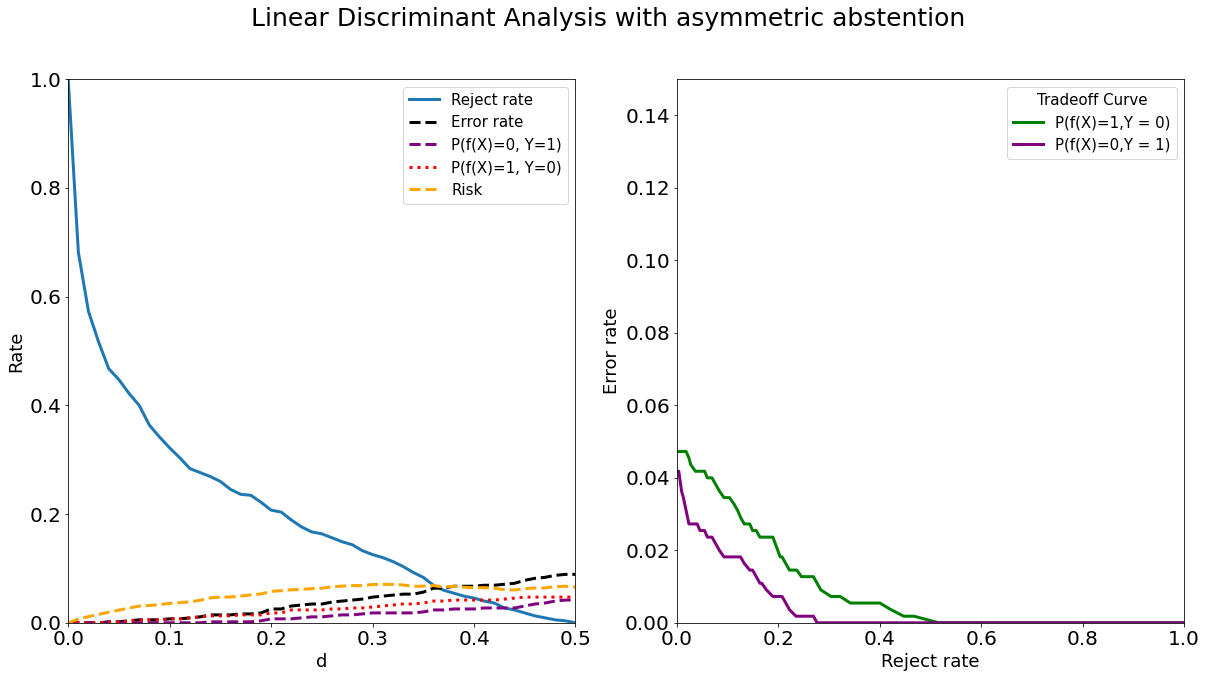

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})


fig.suptitle('Linear Discriminant Analysis with asymmetric abstention', size = 25)


for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

# Breast Cancer Wisconsin

In [5]:
jsonk = {"username":"nicolailawrenz","key":"e089bc3bc7d90a6d718336400adc8805"}
import json

with open('kaggle.json', 'w') as fp:
    json.dump(jsonk, fp)
import time
time.sleep(60)

In [9]:
! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json


In [10]:
! kaggle datasets list

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                 5MB  2022-11-13 15:47:17          13960        398  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india    Credit Card Spending Habits in India           319KB  2022-12-14 07:30:37           1066         44  1.0              
michals22/coffee-dataset                                        Coffee dataset                                  24KB  2022-12-15 20:02:12           3213         75  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce Sales Data

In [11]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 4.29MB/s]


In [12]:
!unzip breast-cancer-wisconsin-data.zip -d train

Archive:  breast-cancer-wisconsin-data.zip
  inflating: train/data.csv          


In [13]:
cancer_df = pd.read_csv('/content/train/data.csv')

In [14]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
y = cancer_df.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = cancer_df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
len(x.columns)

30

benign (B) - gut    
malign (M) - schlecht

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Benign:  357
Number of Malignant :  212


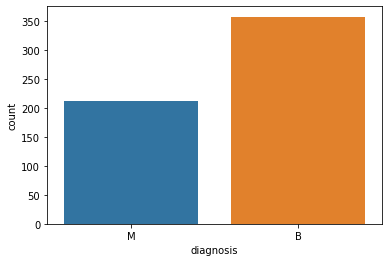

In [17]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [18]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Local Polynomial Regression

### With all features

In [22]:
x_arr = x.to_numpy()
x_norm = normalize(x_arr, axis = 0)

In [23]:
from sklearn.model_selection import train_test_split as tts
y_num = y == 'M'
y_num = y_num*1
y_num = y_num.to_numpy()
x_norm = normalize(x_arr, axis = 0)

X_train, X_test, y_train, y_test = tts(x_norm, y_num, test_size=0.2, random_state=42)

In [ ]:
degree = 2
start = time.time()
z0 = localreg(X_train, y_train, X_test, degree=degree, kernel=rbf.epanechnikov, radius=0.6)
end = time.time()
z0[z0>1] = 1
z0[z0<0] = 0
y_hat = abstention(z0, d = 0.5)
print(np.mean(y_hat == y_test))
print(z0)
print(f'Time: {end-start}')

KeyboardInterrupt: ignored

### Decision Tree based Feature Selection

In [ ]:
names = ['area_mean', 'concavity_mean', 'concavity_se', 'concavity_worst', 'area_se']
x_arr = x[names]
x_arr.head()

,area_mean,concavity_mean,concavity_se,concavity_worst,area_se
0,1001.0,0.3001,0.05373,0.7119,153.40
1,1326.0,0.0869,0.01860,0.2416,74.08
2,1203.0,0.1974,0.03832,0.4504,94.03
3,386.1,0.2414,0.05661,0.6869,27.23
4,1297.0,0.1980,0.05688,0.4000,94.44


In [ ]:
x_arr = x_arr.to_numpy()

x_norm = normalize(x_arr, axis = 0)

In [ ]:
from sklearn.model_selection import train_test_split as tts
y_num = (y == 'M')*1
y_num = y_num.to_numpy()
X_train, X_test, y_train, y_test = tts(x_norm, y_num, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(398, 5)

In [ ]:
degree = 2

z0 = localreg(X_train, y_train, X_test, degree=degree, kernel=rbf.epanechnikov, radius=0.6)
z0[z0>1] = 1
z0[z0<0] = 0
y_hat = abstention(z0, d = 0.5)
print(np.mean(y_hat == y_test))
print(z0)

0.9532163742690059
[0.40143784 0.86957034 0.82486539 0.05086666 0.         1.
 0.96499516 0.65785839 0.56132097 0.07076463 0.05787903 0.63932243
 0.05245634 0.70604585 0.11285129 0.8080326  0.12555144 0.
 0.         1.         0.46693546 0.17260826 1.         0.
 0.         0.32989438 0.18083133 0.         0.02787147 1.
 0.         0.         0.1552267  0.06488804 0.         0.07054586
 0.31988493 0.10575497 0.84834995 0.18857668 0.         0.69658685
 0.23251291 0.         0.40690155 0.23296984 0.         0.0155211
 0.21110061 0.08558813 0.76168717 1.         0.42142699 0.34993192
 0.         0.20701968 0.07362773 0.94593355 0.68510935 0.04991071
 0.1081879  1.         1.         0.11345777 0.         0.28758053
 1.         0.78886106 0.         0.1966026  0.65711505 0.73414851
 0.02119244 0.86562158 0.         0.25248196 0.02478643 0.52489456
 0.         0.33429231 0.66059876 0.         0.45985061 1.
 0.54261522 0.90980053 1.         1.         0.1096324  0.10095018
 0.14427648 0.261

### Dropping the last 2 feature

In [ ]:
names = ['area_mean', 'concavity_mean', 'concavity_se']
x_arr = x[names]
x_arr.head()

,area_mean,concavity_mean,concavity_se
0,1001.0,0.3001,0.05373
1,1326.0,0.0869,0.01860
2,1203.0,0.1974,0.03832
3,386.1,0.2414,0.05661
4,1297.0,0.1980,0.05688


In [ ]:
x_arr = x_arr.to_numpy()
x_norm = normalize(x_arr, axis = 0)

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(x_norm, y_num, test_size= 0.1, random_state=1)

In [ ]:
degree = 2

z0 = localreg(X_train, y_train, X_test, degree=degree, kernel=rbf.epanechnikov, radius=0.7)
z0[z0>1] = 1
z0[z0<0] = 0
y_hat = abstention(z0, d = 0.5)
print(np.mean(y_hat == y_test))
#print(z0)

0.9649122807017544


### Asymmetrical abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
t1,t2 = 1, 1/4

In [ ]:
#
probs = z0
RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
A,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
B,1.0,0.997500,0.995000,0.992500,0.990000,0.987500,0.985000,0.982500,0.980000,0.977500,...,0.897500,0.895000,0.892500,0.890000,0.887500,0.885000,0.882500,0.880000,0.877500,0.875000
Reject_Rate,1.0,0.754386,0.754386,0.736842,0.736842,0.719298,0.719298,0.701754,0.666667,0.666667,...,0.105263,0.087719,0.070175,0.052632,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000
Error_Rate,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088
TypI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544
TypII,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544


In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

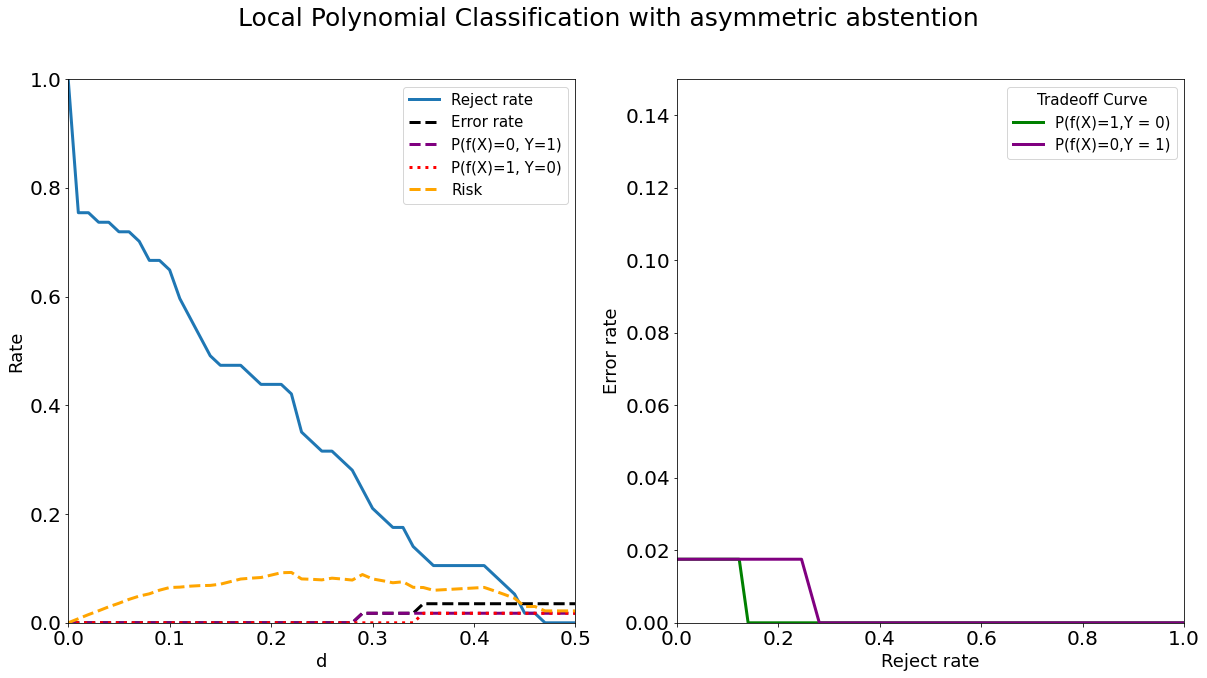

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})

fig.suptitle('Local Polynomial Classification with asymmetric abstention', size = 25)

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## Linear Discriminant Analysis

In [21]:
from sklearn.model_selection import train_test_split as tts
x.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

#names = ['area_mean', 'concavity_mean', 'concavity_se', 'concavity_worst', 'area_se']
x_arr = x#[names]

X_train, X_test, y_train, y_test = tts(x_arr, y_num, test_size= 0.3, random_state=1)

NameError: ignored

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:

lda = LDA(n_components=1, solver='svd', store_covariance=True).fit(X_train, y_train)
y_hat = lda.predict(X_test)
np.mean(y_hat == y_test)

0.9532163742690059

### Asymmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [ ]:
t1,t2 = 1, 1/4

In [ ]:
probs = lda.predict_proba(X_test)[:,1]
RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
A,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
B,1.0,0.997500,0.995000,0.992500,0.990000,0.987500,0.985000,0.982500,0.980000,0.977500,...,0.897500,0.895000,0.892500,0.890000,0.887500,0.885000,0.882500,0.880000,0.877500,0.875000
Reject_Rate,1.0,0.245614,0.192982,0.157895,0.152047,0.134503,0.128655,0.111111,0.076023,0.076023,...,0.011696,0.011696,0.011696,0.005848,0.005848,0.005848,0.005848,0.000000,0.000000,0.000000
Error_Rate,0.0,0.005848,0.005848,0.005848,0.005848,0.011696,0.011696,0.011696,0.023392,0.023392,...,0.035088,0.035088,0.035088,0.040936,0.040936,0.040936,0.040936,0.046784,0.046784,0.046784
TypI,0.0,0.005848,0.005848,0.005848,0.005848,0.011696,0.011696,0.011696,0.023392,0.023392,...,0.035088,0.035088,0.035088,0.040936,0.040936,0.040936,0.040936,0.040936,0.040936,0.040936
TypII,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848,0.005848,0.005848


In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

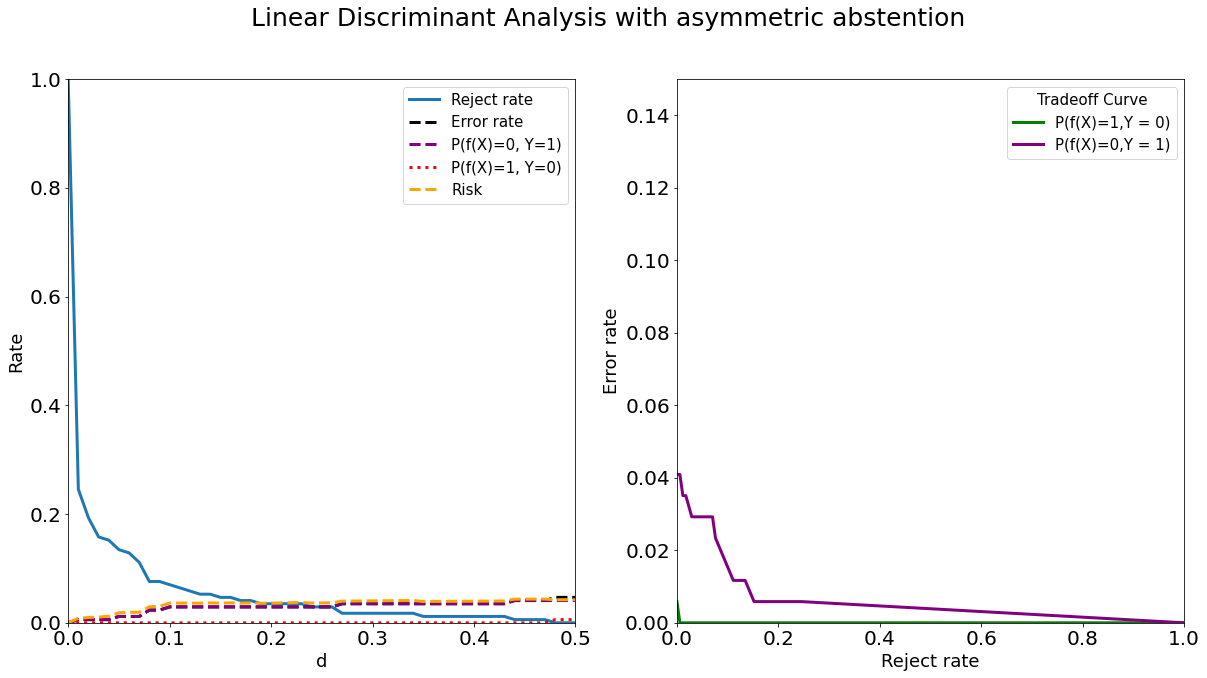

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})

fig.suptitle('Linear Discriminant Analysis with asymmetric abstention', size = 25)

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## Gaussian Naive Bayes

In [24]:

X_train, X_test, y_train, y_test = tts(x_arr, y_num, test_size= 0.2, random_state=1)

In [25]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
np.mean(y_hat == y_test)

0.9473684210526315

In [26]:
1-0.9474


0.05259999999999998

### Asymmetric Abstention

In [27]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5


In [28]:
t1,t2 = 1, 1/4

In [29]:
probs = clf.predict_proba(X_test)[:,1]
RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
d,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
A,0.0,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.410000,0.420000,0.430000,0.440000,0.450000,0.460000,0.470000,0.480000,0.490000,0.500000
B,1.0,0.997500,0.995000,0.992500,0.990000,0.987500,0.985000,0.982500,0.980000,0.977500,...,0.897500,0.895000,0.892500,0.890000,0.887500,0.885000,0.882500,0.880000,0.877500,0.875000
Reject_Rate,1.0,0.026316,0.017544,0.017544,0.008772,0.008772,0.008772,0.008772,0.008772,0.008772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Error_Rate,0.0,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,...,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632
TypI,0.0,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,...,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088
TypII,0.0,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,...,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544


In [30]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

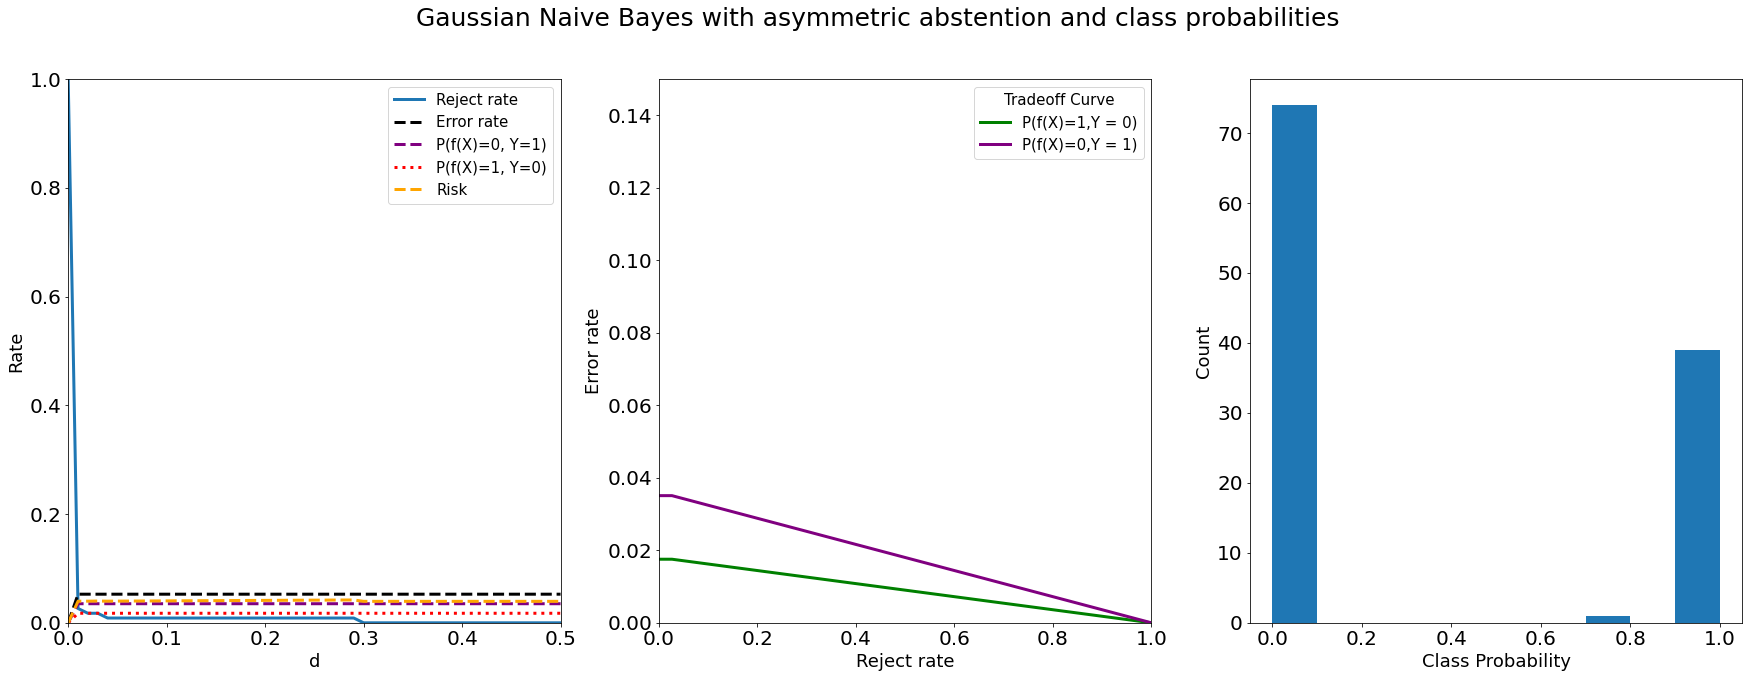

In [48]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 3, figsize=(30,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})

fig.suptitle('Gaussian Naive Bayes with asymmetric abstention and class probabilities', size = 25)

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

ax[2].hist(probs)
ax[2].set_xlabel("Class Probability" ,fontsize = fontsize)
ax[2].set_ylabel("Count" ,fontsize = fontsize)

for tick in ax[2].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[2].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


plt.show()

In [32]:

X_train, X_test, y_train, y_test = tts(x_arr, y_num, test_size= 0.1, random_state=1)

## Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier as RC
clf = RC()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

np.mean(y_hat == y_test)


0.9649122807017544

In [ ]:
1-np.mean(y_hat==y_test)

0.03508771929824561

### Asymmetric Abstention

In [ ]:
d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})
rates.T

In [ ]:
t1,t2 = 1, 1/4

In [ ]:
def norm(x):
  max = np.max(x)
  min = np.min(x)
  return (x+1)/2


In [ ]:
z0 = clf.decision_function(X_test)
z0 = norm(z0)


z0[z0<0] = 0
z0[z0>1] = 1
probs = z0
RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII

rates.T

In [ ]:
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})

fig.suptitle('Ridge Classification with asymmetric abstention', size = 25)

for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)


In [ ]:
np.mean(preds == y_test)


In [ ]:
from xgboost import plot_tree

In [ ]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 30,30

plot_tree(xgb_cl)
plt.show()

# Portuguese Red Wine Quality Data

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(url, sep=';')
wine_df['class'] = (wine_df['quality'] > 6)*1


In [ ]:
y = wine_df['class']
X = wine_df.drop(['quality', 'class'], axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
(wine_df['class']==0).sum()

1382

In [ ]:
from sklearn.model_selection import train_test_split as tts
X.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

X_train, X_test, y_train, y_test = tts(X, y, test_size= 0.3, random_state=1)

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1, solver='svd', store_covariance=True).fit(X_train, y_train)
y_hat = lda.predict(X_test)
np.mean(y_hat == y_test)

0.8770833333333333

### Symmetric Abstention

In [ ]:
probs = lda.predict_proba(X_test)[:,1]


t1,t2 = 1, 1

d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})


RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

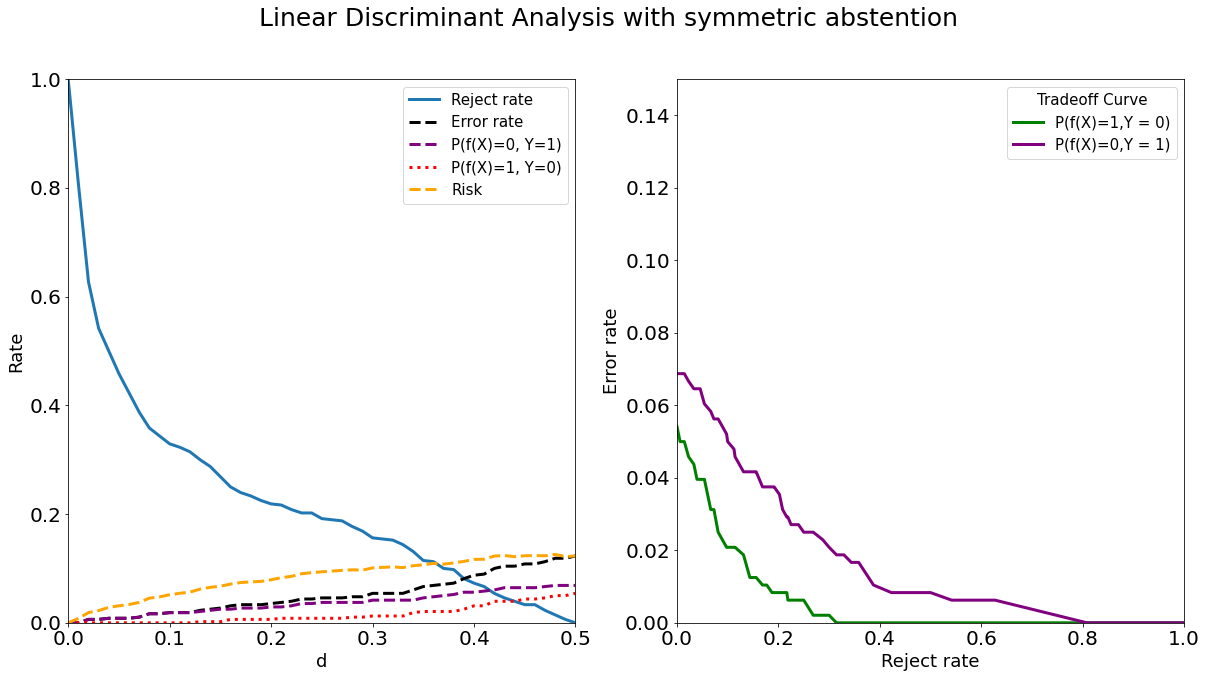

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})


fig.suptitle('Linear Discriminant Analysis with symmetric abstention', size = 25)


for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## Gaussian Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split as tts
X.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

X_train, X_test, y_train, y_test = tts(X, y, test_size= 0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
np.mean(y_hat == y_test)

0.8229166666666666

### Symmetric Abstention

In [ ]:
probs = clf.predict_proba(X_test)[:,1]


t1,t2 = 1, 1

d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})


RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

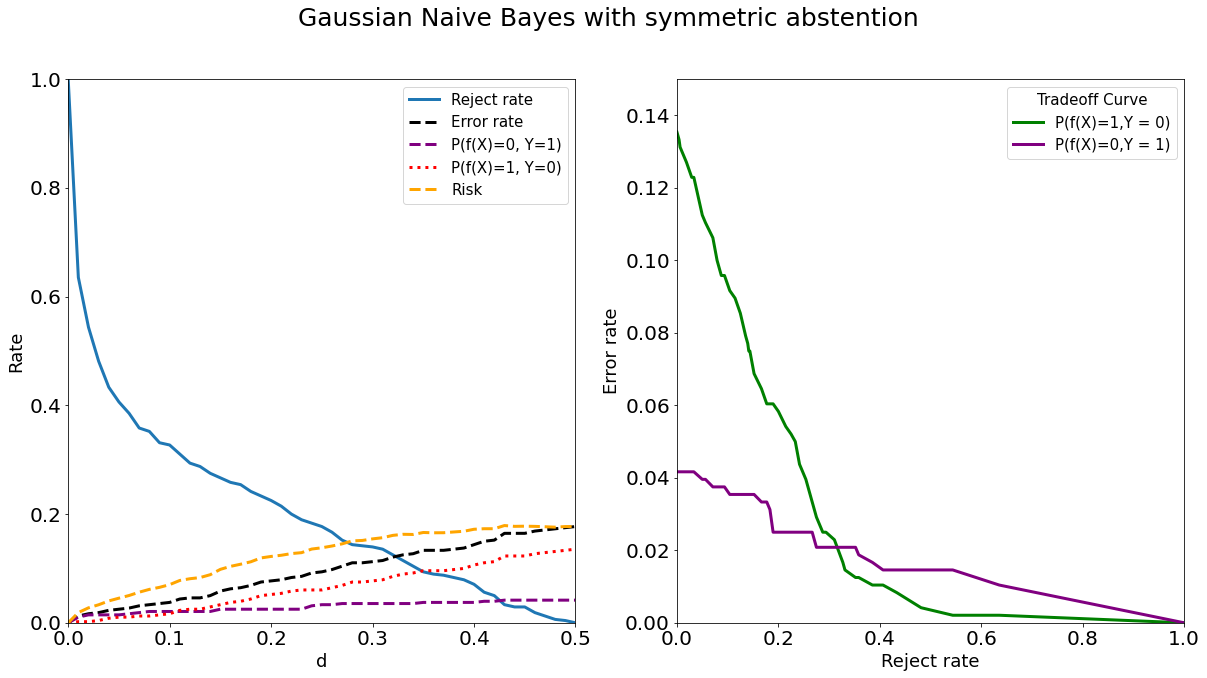

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})


fig.suptitle('Gaussian Naive Bayes with symmetric abstention', size = 25)


for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## Ridge Regression 

In [ ]:
from sklearn.linear_model import RidgeClassifier as RC
clf = RC()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

def norm(x):
  max = np.max(x)
  min = np.min(x)
  return (x+1)/2

np.mean(y_hat == y_test)

0.8875

### Symmetric Abstention

In [ ]:
z0 = clf.decision_function(X_test)
z0 = norm(z0)



z0[z0<0] = 0
z0[z0>1] = 1
probs = z0

d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})


RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

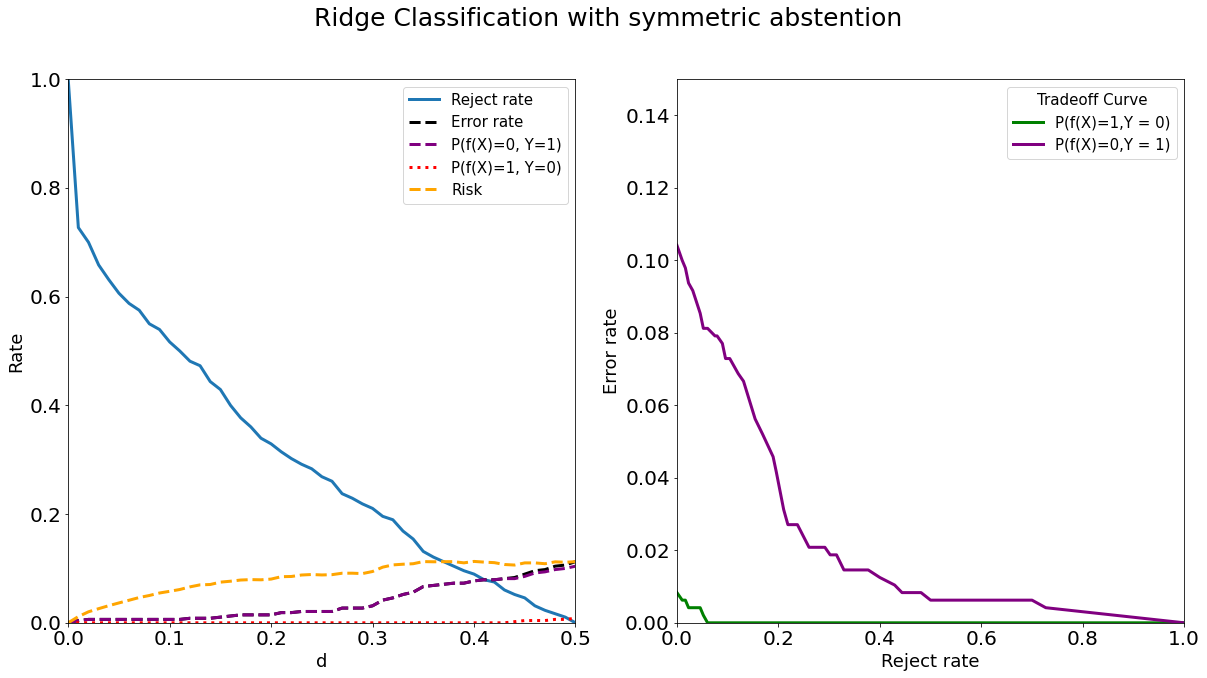

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})


fig.suptitle('Ridge Classification with symmetric abstention', size = 25)


for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

## Local Polynomial Regression

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
x_arr = X.to_numpy()
x_norm = normalize(x_arr, axis = 0)
y_num = y.to_numpy()
X_train, X_test, y_train, y_test = tts(x_norm, y_num, test_size=0.2, random_state=42)

In [ ]:
degree = 2
start = time.time()
z0 = localreg(X_train, y_train, X_test, degree=degree, kernel=rbf.cosine, radius=0.5)
end = time.time()
'''z0[z0>1] = 1
z0[z0<0] = 0'''
y_hat = abstention(z0, d = 0.5)
print(np.mean(y_hat == y_test))


print(end - start)

0.88125
98.6515142917633


### Symmetric Abstention

In [ ]:
probs = z0


t1,t2 = 1, 1

d_arr = np.linspace(0,0.5,51)
rates = pd.DataFrame({'d':d_arr})


RR = np.array([])
ER = np.array([])
AA = np.array([])
BB = np.array([])
TYPI = np.array([])
TYPII = np.array([])
for d in d_arr:
  a = d*t1
  b = 1-d*t2
  abs = abstention(probs, d = a, d2 = b)
  R = np.mean(abs == 2)
  #abs1 = 
  typI = np.mean((y_test == 1) & (abs == 0))
  typII = np.mean((y_test == 0) & (abs == 1))
  E = np.mean((y_test != abs) & (abs != 2))

  RR = np.append(RR,R)
  ER = np.append(ER,E)
  AA = np.append(AA,a)
  BB = np.append(BB,b)
  TYPI = np.append(TYPI,typI)
  TYPII = np.append(TYPII,typII)

rates['A'] = AA
rates['B'] = BB
rates['Reject_Rate'] = RR
rates['Error_Rate'] = ER
rates['TypI'] = TYPI
rates['TypII'] = TYPII
rates['Risk'] = rates['Reject_Rate']*rates['d'] + t1*rates['TypI'] + t2*rates['TypII']

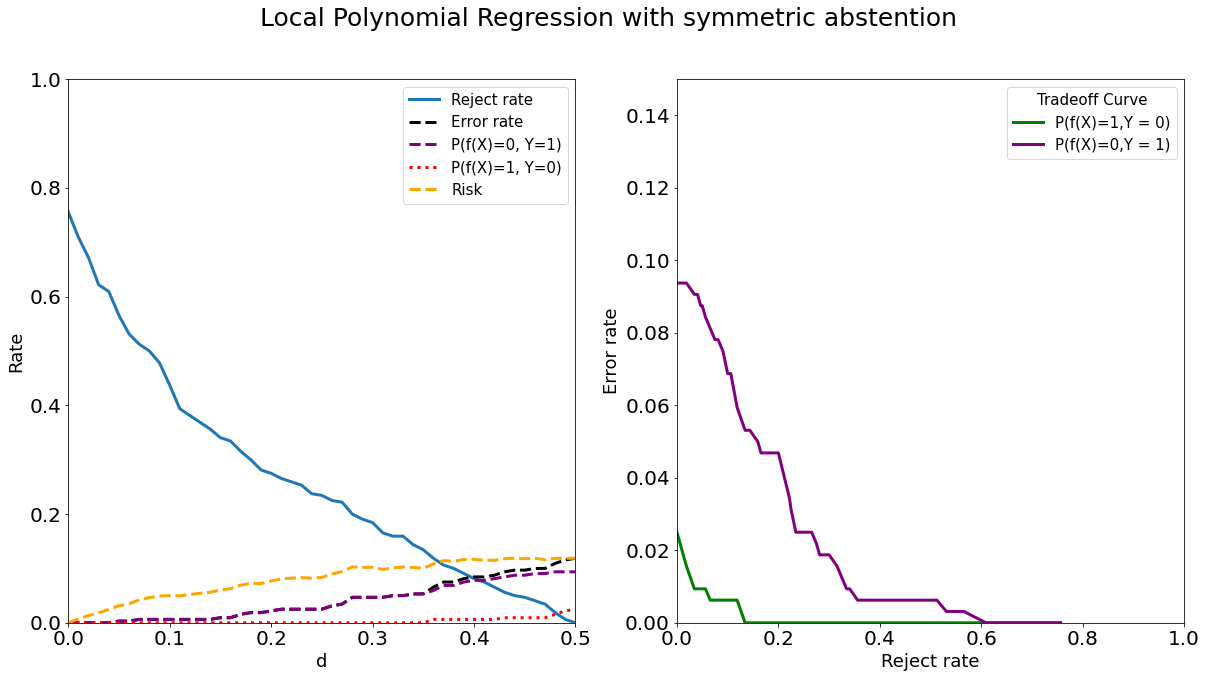

In [ ]:
linewidth = 3
fontsize = 18


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(rates['d'], rates['Reject_Rate'], label = 'Reject rate', linewidth = linewidth)

ax[0].plot(rates['d'], rates['Error_Rate'],label = 'Error rate', 
         color='black',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].plot(rates['d'], rates['TypI'],label = 'P(f(X)=0, Y=1)', 
         color='purple',   
         linewidth=linewidth,  
         linestyle='dashed' 
        )

ax[0].plot(rates['d'], rates['TypII'],label = 'P(f(X)=1, Y=0)', 
         color='red',   
         linewidth=linewidth,  
         linestyle='dotted'
        )

ax[0].plot(rates['d'], rates['Risk'],label = 'Risk', 
         color='orange',   
         linewidth=linewidth,  
         linestyle='--' 
        )

ax[0].set_xlim([0, 0.5])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('d',fontsize = fontsize)
ax[0].set_ylabel('Rate',fontsize = fontsize)

legend = ax[0].legend(loc="upper right",prop={'size': 15})

for tick in ax[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 


ax[1].plot(rates['Reject_Rate'],rates['TypII'],label = 'P(f(X)=1,Y = 0)',
         color='green',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})


ax[1].plot(rates['Reject_Rate'],rates['TypI'],label = 'P(f(X)=0,Y = 1)',
         color='purple',   
         linewidth=linewidth 
        )
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel('Reject rate',fontsize = fontsize)
ax[1].set_ylabel('Error rate',fontsize = fontsize)
legend = ax[1].legend(loc="upper right",prop={'size': 15})
legend.set_title('Tradeoff Curve',prop={'size': 15})


fig.suptitle('Local Polynomial Regression with symmetric abstention', size = 25)


for tick in ax[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(20) 
for tick in ax[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(20) 

plt.show()

### sonstiges

In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
np.mean(preds == y_test)


0.8916666666666667

# Figure

In [ ]:
def logistic(x, beta = 1):
  return 1/(1+np.exp(-x*beta))

In [ ]:
lin = np.arange(-10,10,0.5)

In [ ]:
a = logistic(lin)

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 5), dpi=80)

plt.plot(lin,a)

In [ ]:
b = np.arange(-10,11, 1)
z0 = localreg(lin, a, b, degree = 3)

In [ ]:
figure(figsize=(10, 5), dpi=80)

plt.plot(b, z0)

In [ ]:
z1 = z0

In [ ]:
size = len(z0) 
noise = np.random.normal(loc=0.0, scale=0.1, size = size)

In [ ]:

z1 = z1 + noise

In [ ]:
z1[z1>1] = 1
z1[z1<0] = 0

In [ ]:
linewidth = 6
fontsize = 30



fig, ax = plt.subplots(1, 1, figsize=(20, 16))
ax.plot(lin, a, label = r"$\eta(x)$", linewidth = linewidth, color = 'black')
ax.plot(b, z1 ,label = r"$\hat{\eta}(x)$", 
         color='black',   
         linewidth=linewidth,  
         linestyle=':' 
        )
ax.set_xlim([-10, 10])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('x',fontsize = fontsize)
ax.set_ylabel('y',fontsize = fontsize)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.hlines(0.5, -10, 10, colors='black', linestyles='solid',linewidth = 4)
plt.legend(loc="upper left",prop={'size': 30})

for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(30) 

plt.show()

In [ ]:
lin = np.arange(-10,10,0.5)
lin1 = np.arange(-10,11,0.5)

def const(x, c):
  shape = x.shape
  return np.ones(shape)*c

u = const(lin1, 0.6)
l = const(lin1, 0.4)

In [ ]:
z1[(z1>0.4)&(z1<0.5)] += -0.1

In [ ]:
linewidth = 6
fontsize = 30



fig, ax = plt.subplots(1, 1, figsize=(20, 16))
ax.plot(lin, a, label = r"$\eta(x)$", linewidth = linewidth, color = 'black')
ax.plot(b, z1 ,label = r"$\hat{\eta}(x)$", 
         color='black',   
         linewidth=linewidth,  
         linestyle=':' 
        )
ax.set_xlim([-10, 10])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('x',fontsize = fontsize)
ax.set_ylabel('y',fontsize = fontsize)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.fill_between(
        x = lin1,
        y1= l, 
        y2= u, 
        color= "grey",
        alpha= 2/10)

ax.hlines(0.6, -10, 10, colors='black', linestyles='solid',linewidth = 4)
ax.hlines(0.4, -10, 10, colors='black', linestyles='solid',linewidth = 4)



plt.legend(loc="upper left",prop={'size': 30})

for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(30) 

plt.show()

In [ ]:
l

In [ ]:
import pygame

# Initialize Pygame
pygame.init()

# Set the window size
window_size = (640, 480)

# Create the window
screen = pygame.display.set_mode(window_size)

# Load the Mario sprite
mario_sprite = pygame.image.load("mario.png")

# Set the initial position of Mario
mario_x = 0
mario_y = 0

# Set the gravity
gravity = 0.5

# Set the initial velocity of Mario
mario_vx = 0
mario_vy = 0

# Set the jump strength
jump_strength = -10

# Set the maximum falling speed
max_falling_speed = 10

# Set the movement speed
movement_speed = 5

# Set the frame rate
frame_rate = 60

# Set the clock
clock = pygame.time.Clock()

# Set the running flag
running = True

# Main game loop
while running:
  # Handle events
  for event in pygame.event.get():
    if event.type == pygame.QUIT:
      running = False
    if event.type == pygame.KEYDOWN:
      if event.key == pygame.K_LEFT:
        mario_vx = -movement_speed
      if event.key == pygame.K_RIGHT:
        mario_vx = movement_speed
      if event.key == pygame.K_UP:
        mario_vy = jump_strength
  
  # Apply gravity
  mario_vy += gravity
  
  # Limit the falling speed
  if mario_vy > max_falling_speed:
    mario_vy = max_falling_speed
  
  # Update the position of Mario
  mario_x += mario_vx
  mario_y += mario_vy
  
  # Draw the screen
  screen.fill((0, 0, 0))
  screen.blit(mario_sprite, (mario_x, mario_y))
  pygame.display.flip()
  
  # Limit the frame rate
  clock.tick(frame_rate)

# Quit Pygame
pygame.quit()


In [ ]:
!pip install pygame